<a href="https://colab.research.google.com/github/sagyn19/nes1/blob/main/Copy_of_NES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your Excel file
df = pd.read_excel("fifa_players_nes1.xlsx")  # adjust the path if needed

# Step 1: Simplify player positions
def simplify_position(pos_str):
    pos_str = pos_str.upper()
    if "GK" in pos_str:
        return "GK"
    elif any(p in pos_str for p in ["CB", "LB", "RB", "LWB", "RWB"]):
        return "D"
    elif any(p in pos_str for p in ["CM", "CDM", "CAM", "LM", "RM"]):
        return "M"
    elif any(p in pos_str for p in ["CF", "ST", "LW", "RW"]):
        return "F"
    return "Other"

df["main_position"] = df["positions"].apply(simplify_position)

# Step 2: Keep only D, M, F players
df_filtered = df[df["main_position"].isin(["D", "M", "F"])].copy()

# Step 3: Select relevant numerical features
feature_columns = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'composure', 'marking', 'standing_tackle', 'sliding_tackle'
]

X = df_filtered[feature_columns].values
y = df_filtered["main_position"].map({"D": 0, "M": 1, "F": 2}).values

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: print shapes and class distribution
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Train labels:", np.bincount(y_train))
print("Test labels:", np.bincount(y_test))



X_train: (362, 29)
X_test: (91, 29)
Train labels: [124 170  68]
Test labels: [31 43 17]


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss from training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3936 - loss: 7.9151 - val_accuracy: 0.5753 - val_loss: 3.3434
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6244 - loss: 2.0723 - val_accuracy: 0.6164 - val_loss: 1.3595
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6671 - loss: 1.3796 - val_accuracy: 0.6712 - val_loss: 1.1941
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7047 - loss: 1.1253 - val_accuracy: 0.6164 - val_loss: 1.7718
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6605 - loss: 1.9334 - val_accuracy: 0.6301 - val_loss: 1.0693
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7411 - loss: 0.9402 - val_accuracy: 0.6575 - val_loss: 1.5322
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6856 - loss: 1.1884 - val_accuracy: 0.7260 - val_loss: 1.0668
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6605 - loss: 1.0006 - val_accuracy: 0.6849 - va

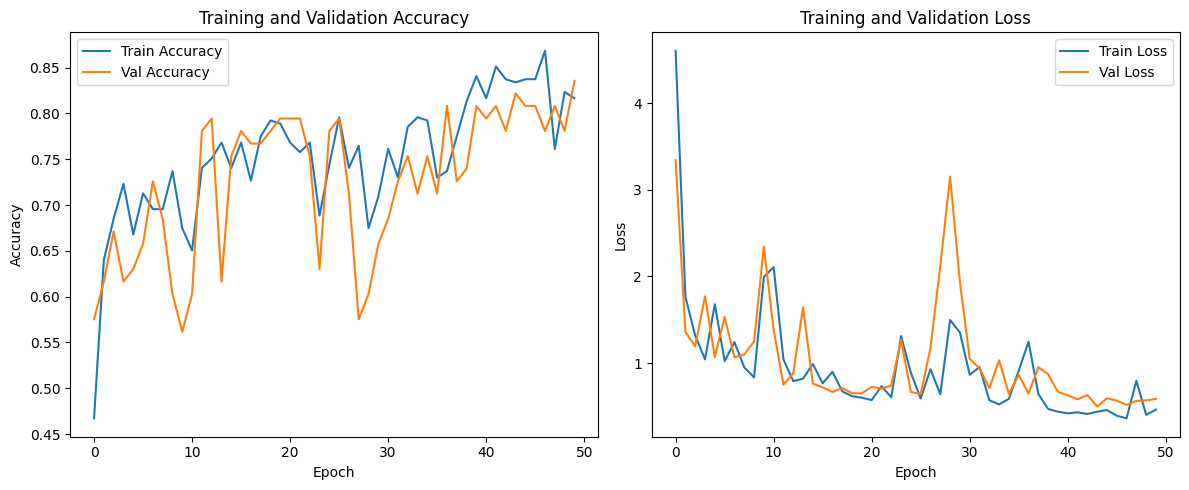

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

# Build the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),     # 29 features
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')        # 3 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test accuracy: {test_acc:.2f}")

# Predict and show classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

print("\n🧾 Classification report:")
print(classification_report(y_test, y_pred, target_names=["Defender", "Midfielder", "Forward"]))
plot_training_history(history)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split encoded target into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train logistic regression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

# Evaluate
y_pred_log = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(
    y_test, y_pred_log,
    target_names=[str(cls) for cls in label_encoder.classes_]
))




Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.89      0.91      0.90        46
           2       0.80      0.80      0.80        20

    accuracy                           0.90        91
   macro avg       0.90      0.89      0.89        91
weighted avg       0.90      0.90      0.90        91



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd

# Example results
results = {
    "Model": ["Neural Network", "Logistic Regression"],
    "Accuracy": [
        model.evaluate(X_test, y_test, verbose=0)[1],
        logreg.score(X_test, y_test)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0       Neural Network  0.736264
1  Logistic Regression  0.901099
